Replicate Policy Impact in KW94 page 667:
"a 500 dollar per-perod subsidy assuming data set one paramters increases schooling by 1.44 periods"

In [3]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import respy as rp

from python.mc_uncertainty_propagation import *
from python.model_wrapper import model_wrapper_kw_94
from python.cov_matrix import create_cov_matrix
from python.distplot import distplot
from python.convergence_plot import convergence_plot

# The next two cells illustrate Data Set 3 discrepancies between respy and this repo.

# Have a look at the shocks paramters.

In [6]:
params, options = rp.get_example_model("kw_94_three", with_data=False)
params

value  \
category    name                                 
delta       delta                        0.950   
wage_a      constant                     8.000   
            exp_edu                      0.070   
            exp_a                        0.055   
            exp_a_square                 0.000   
            exp_b                        0.000   
            exp_b_square                 0.000   
wage_b      constant                     7.900   
            exp_edu                      0.070   
            exp_b                        0.060   
            exp_b_square                 0.000   
            exp_a                        0.055   
            exp_a_square                 0.000   
nonpec_edu  constant                  5000.000   
            at_least_twelve_exp_edu  -5000.000   
            not_edu_last_period     -20000.000   
nonpec_home constant                 21500.000   
shocks      sd_a                         1.000   
            sd_b                         1.000   
            sd_edu                    7000.000   
            sd_home                   8500.000   
            corr_b_a                     0.500   
            corr_edu_a                   0.000   
            corr_edu_b                   0.000   
            corr_home_a                  0.000   
            corr_home_b                  0.000   
            corr_home_edu               -0.500   
meas_error  sd_a                         1.000   
            sd_b                         1.000   

                                                                               comment  
category    name                                                                        
delta       delta                                                      discount factor  
wage_a      constant                                               log of rental price  
            exp_edu                          return to an additional year of schooling  
            exp_a                                     return to same sector experience  
            exp_a_square                   return to same sector, quadratic experience  
            exp_b                                    return to other sector experience  
            exp_b_square                  return to other sector, quadratic experience  
wage_b      constant                                               log of rental price  
            exp_edu                          return to an additional year of schooling  
            exp_b                                     return to same sector experience  
            exp_b_square                   return to same sector, quadratic experience  
            exp_a                                    return to other sector experience  
            exp_a_square                  return to other sector, quadratic experience  
nonpec_edu  constant                            constant reward for choosing education  
            at_least_twelve_exp_edu        reward for going to college (tuition, etc.)  
            not_edu_last_period                        reward for going back to school  
nonpec_home constant                         constant reward of non-market alternative  
shocks      sd_a                     Element 1,1 of standard-deviation/correlation ...  
            sd_b                     Element 2,2 of standard-deviation/correlation ...  
            sd_edu                   Element 3,3 of standard-deviation/correlation ...  
            sd_home                  Element 4,4 of standard-deviation/correlation ...  
            corr_b_a                 Element 2,1 of standard-deviation/correlation ...  
            corr_edu_a               Element 3,1 of standard-deviation/correlation ...  
            corr_edu_b               Element 3,2 of standard-deviation/correlation ...  
            corr_home_a              Element 4,1 of standard-deviation/correlation ...  
            corr_home_b              Element 4,2 of standard-deviation/correlation ... 

In [7]:
df = pd.read_csv("csv/table43_kw_94.csv", sep=",")
p = pd.Series(data=df["true"].values, index=df["parameter"].values)
ds3 = transform_params_kw94_respy(p)
ds3

category     name                   
delta        delta                          0.950000
wage_a       constant                       8.000000
             exp_edu                        0.070000
             exp_a                          0.055000
             exp_a_square                  -0.000000
             exp_b                          0.000000
             exp_b_square                  -0.000000
wage_b       constant                       7.900000
             exp_edu                        0.070000
             exp_b                          0.060000
             exp_b_square                  -0.000000
             exp_a                          0.550000
             exp_a_square                  -0.000000
nonpec_edu   constant                    5000.000000
             at_least_twelve_exp_edu    -5000.000000
             not_edu_last_period       -20000.000000
nonpec_home  constant                   21500.000000
shocks       sd_a                           1.000000
         

## Check convergence behavior for DS1

In [11]:
params, options = rp.get_example_model("kw_94_one", with_data=False)

In [12]:
expected_qoi = model_wrapper_kw_94(params["value"].to_numpy())

In [13]:
expected_qoi

1.5417500000000004

In [14]:
cov_df = create_cov_matrix()

In [15]:
# get mean vector from KW94 table4.2 vecor. 
df = pd.read_csv("csv/table41_kw_94.csv", sep=",")
mean = pd.Series(data=df["true"].values, index=df["parameter"].values)

In [20]:
qoi = mc_uncertainty_propagation(mean, cov_df, 300, save_json=True)

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

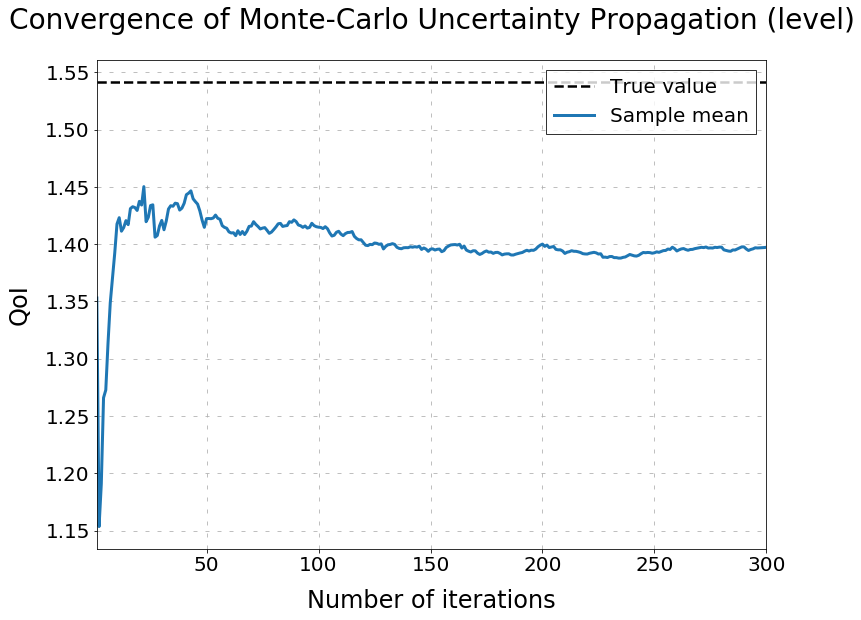

In [21]:
convergence_plot(qoi, expected_qoi, "QoI")

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

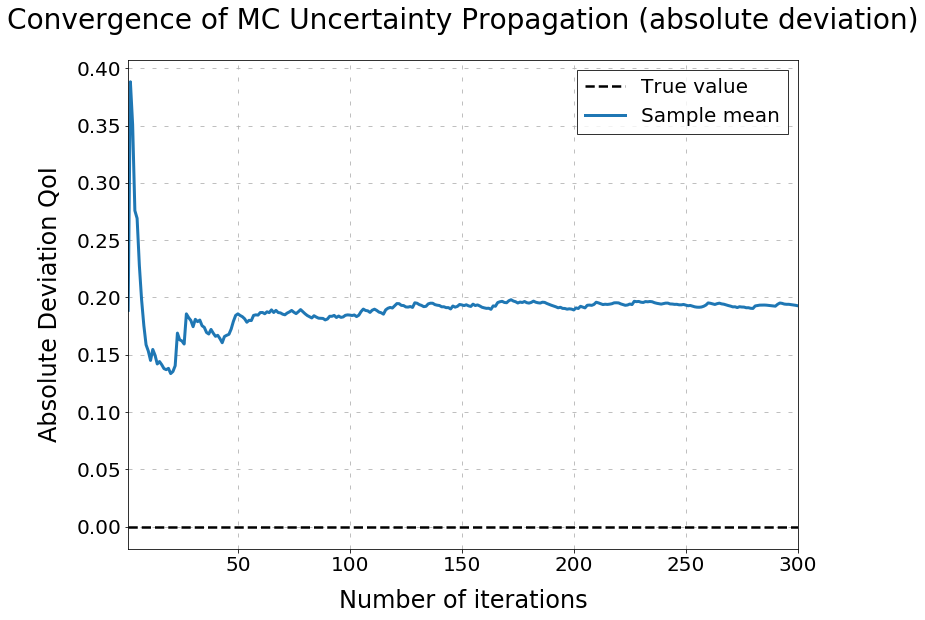

In [22]:
convergence_plot(qoi, expected_qoi, "Absolute Deviation QoI", absolute_deviation=True)

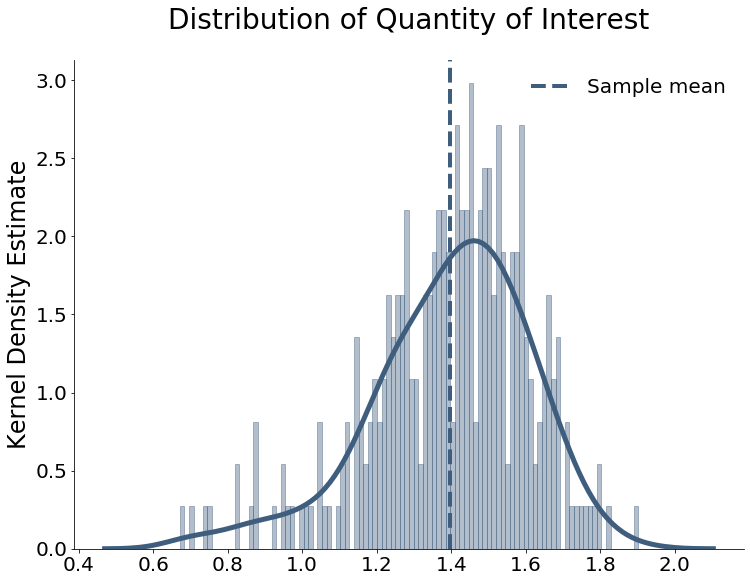

In [23]:
distplot(qoi)